In [2]:
# Kaggle: https://www.kaggle.com/mirichoi0218/insurance

import math
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

ins = pd.read_csv(r'C:\Users\ojiang1\Desktop\Data Science\Capstone1_Experimental design\insurance.csv')

# general info and check whether there is missing value.

ins.info()
ins.head()
print(ins['age'].unique())
print(ins['children'].unique())
print(ins['region'].unique())
print(ins['smoker'].unique())
ins1=ins.dropna()
ins1.shape  # no missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB
[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[0 1 3 2 5 4]
['southwest' 'southeast' 'northwest' 'northeast']
['yes' 'no']


(1338, 7)

In [3]:
# confirm common sense that male pay more insurance charges
ins.groupby(['sex']).mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [4]:
# confirm common sense that smoker pay more insurance charges
ins.groupby(['smoker']).mean()

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [52]:
# what about group smoker and sex?
ins.groupby(['smoker','sex'])['charges'].mean()

smoker  sex   
no      female     8762.297300
        male       8087.204731
yes     female    30678.996276
        male      33042.005975
Name: charges, dtype: float64

In [5]:
# The charge differences between smoker and non-smokers are WAY MORE than that between female and male.
# SO Lets focus on smoker and non-smoker comparison now.

# split the data into smokers and non smokers

ins_smoker = ins[(ins['smoker'] == 'yes')]
ins_nonsmoker = ins[(ins['smoker'] == 'no')]


print(ins_smoker.info())
print(ins_nonsmoker.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
age         274 non-null int64
sex         274 non-null object
bmi         274 non-null float64
children    274 non-null int64
smoker      274 non-null object
region      274 non-null object
charges     274 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
age         1064 non-null int64
sex         1064 non-null object
bmi         1064 non-null float64
children    1064 non-null int64
smoker      1064 non-null object
region      1064 non-null object
charges     1064 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB
None


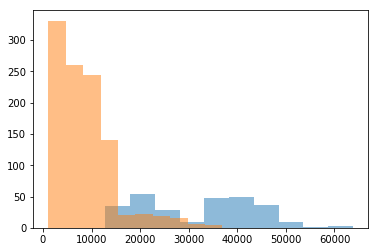

DescribeResult(nobs=274, minmax=(12829.4551, 63770.42801), mean=32050.23183153284, variance=133207311.20634924, skewness=0.127514285857385, kurtosis=-1.0395337984245219)
DescribeResult(nobs=1064, minmax=(1121.8739, 36910.60803), mean=8434.268297856204, variance=35925420.49611173, skewness=1.5359507841880067, kurtosis=3.1288070753114896)
(0.9395521879196167, 3.6251879276250065e-09)
(0.8728628158569336, 1.4455900162299346e-28)


In [6]:
# check whether two sets of data are normal distro?

plt.hist(ins_smoker['charges'], alpha = 0.5)
plt.hist(ins_nonsmoker['charges'], alpha = .5)
plt.show()

print(stats.describe(ins_smoker['charges']))
print(stats.describe(ins_nonsmoker['charges']))

print(stats.shapiro(ins_smoker['charges']))
print(stats.shapiro(ins_nonsmoker['charges']))

# FROM THE HISTPLOT, IT DOES NOT LOOK LIKE NORMAL DISTRO;
# tho it does look like non smoker group has a bit outliars, but we will deal with outliars later.
# FROM THE STATS, IT DOES NOT LIIKE LIKE NORMAL DISTRO;
# FROM THE SHAPIRO TEST, THE STATISTIC IS NOT CLOSE ENOUGH TO 1 FOR ME TO SAY IT IS A NORMAL DISTRO, 
# ASLO THE P VALUE IS WAU LESS THAN 0.005 MEANING REJECTING THE NULL, MEANING THE DISTRO IS NOT NORMAL.

In [7]:
# since the datasets are not normally distributed, then we woll do a Kruskal-Wallis test to see
# how differenct the mean ranks for each group are from one another

stats.kruskal(ins_smoker['charges'], ins_nonsmoker['charges'])

# based on the p-value, I will reject the null that all variables have the same distribution.

KruskalResult(statistic=588.5196583657973, pvalue=5.259018267498522e-130)

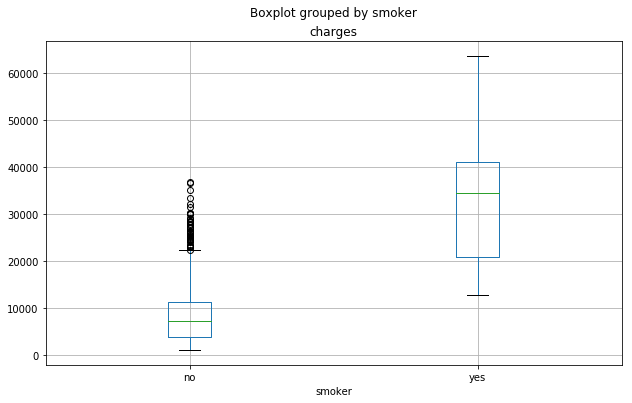

In [8]:
# let's take a visual look at how different the charges for two groups are.
#Create a boxplot

ins.boxplot('charges', by='smoker', figsize=(10, 6))

# Good news, not only can we see the differences in charges, 
# but also we can comfirmed (along with the hist plot at the very begining) that the non smoker group has a lot of outliars


In [39]:
# why not we take the outliars out from the non smoker group?
# how to decide outliars? i will use the 1.5 IQR rule. lo/ho: lower/higher outliar

IQR =  1.5 * stats.iqr(ins_nonsmoker.charges)
LQ = np.quantile(ins_nonsmoker.charges, .25)
HQ = np.quantile(ins_nonsmoker.charges, .75)
lo = LQ - IQR
ho = HQ + IQR
print(lo)  # no lower outliars, consistent w boxplot
print(ho)

11064.672524999998
3986.4387
11362.88705
-7078.2338249999975
22427.559575


In [42]:
# redefine the non smoker group

ins_nonsmoker1 = ins_nonsmoker[ins_nonsmoker.charges<ho]
ins_nonsmoker1.info()
   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 1 to 1336
Data columns (total 7 columns):
age         1018 non-null int64
sex         1018 non-null object
bmi         1018 non-null float64
children    1018 non-null int64
smoker      1018 non-null object
region      1018 non-null object
charges     1018 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 63.6+ KB


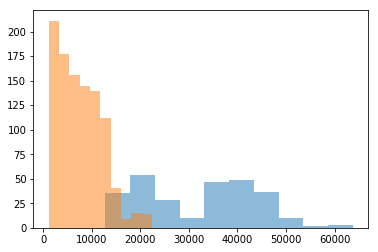

DescribeResult(nobs=274, minmax=(12829.4551, 63770.42801), mean=32050.23183153284, variance=133207311.20634924, skewness=0.127514285857385, kurtosis=-1.0395337984245219)
DescribeResult(nobs=1018, minmax=(1121.8739, 22395.74424), mean=7578.490738073674, variance=20054955.51908741, skewness=0.6444777011423393, kurtosis=0.039532305661045264)


In [44]:
# check whether datasets are normal distro?

plt.hist(ins_smoker['charges'], alpha = 0.5)
plt.hist(ins_nonsmoker1['charges'], alpha = .5)
plt.show()

print(stats.describe(ins_smoker['charges']))
print(stats.describe(ins_nonsmoker1['charges']))

# both skewness and kurtosis are close enough normal distro.

In [47]:
# Conduct the t-test--> p value is close to 0, thus reject null, 
# ie charges for smoker and non smoker has diff

stats.ttest_ind(ins_smoker['charges'], ins_nonsmoker1['charges'])

Ttest_indResult(statistic=54.206424363873396, pvalue=0.0)

In [48]:
# Confidence interval: lets get down to the charges to see how much is the difference.


def get_95_ci(array_1, array_2):
    sample_1_n = array_1.shape[0]
    sample_2_n = array_2.shape[0]
    sample_1_mean = array_1.mean()
    sample_2_mean = array_2.mean()
    sample_1_var = array_1.var()
    sample_2_var = array_2.var()
    mean_difference = sample_2_mean - sample_1_mean
    std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))
    margin_of_error = 1.96 * std_err_difference
    ci_lower = mean_difference - margin_of_error
    ci_upper = mean_difference + margin_of_error
    return("The difference in means at the 95% confidence interval (two-tail) is between "+str(ci_lower)+" and "+str(ci_upper)+".")

get_95_ci(ins_smoker['charges'], ins_nonsmoker1['charges'])

# smokers are paying 23k to 25k more than non smokers do on a 95% confidence interval. 
# that is a lot of money! 


'The difference in means at the 95% confidence interval (two-tail) is between -25865.76609456014 and -23077.716092358227.'

In [78]:
# does BMI do any good? what if smokers actaully have health bmi score? do they still pay more?
# so now we are compare heathly smokers vs healthy nonsmokers.
# per CDC, healthy bmi is 18.5 – 24.9

healthy_smoker = ins_smoker.loc[(ins_smoker['bmi'] >= 18.5) & (ins_smoker['bmi'] <= 24.9)]
healthy_smoker.info()

healthy_nonsmoker = ins_nonsmoker.loc[(ins_nonsmoker['bmi'] >= 18.5) & (ins_nonsmoker['bmi'] <= 24.9)]
healthy_nonsmoker.info()

# among 274 smokers, 50 are considered healthy, bmi wise.
# amg 1064 non-smokers, 172 are considered healthy, bmi wise.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 58 to 1314
Data columns (total 7 columns):
age         50 non-null int64
sex         50 non-null object
bmi         50 non-null float64
children    50 non-null int64
smoker      50 non-null object
region      50 non-null object
charges     50 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 172 entries, 3 to 1328
Data columns (total 7 columns):
age         172 non-null int64
sex         172 non-null object
bmi         172 non-null float64
children    172 non-null int64
smoker      172 non-null object
region      172 non-null object
charges     172 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.8+ KB


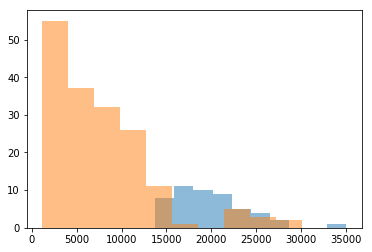

DescribeResult(nobs=50, minmax=(13747.87235, 35069.37452), mean=19942.2236414, variance=17660835.707631227, skewness=0.9964675898737213, kurtosis=1.649193303628139)
DescribeResult(nobs=172, minmax=(1121.8739, 30166.618169999998), mean=7599.638130639536, variance=33139166.31693067, skewness=1.5634890046108005, kurtosis=2.815298368019336)
(0.9382525682449341, 0.011497029103338718)
(0.8528282046318054, 7.175894427280394e-12)


In [82]:
# check whether two sets of data are normal distro?

plt.hist(healthy_smoker['charges'], alpha = 0.5)
plt.hist(healthy_nonsmoker['charges'], alpha = .5)
plt.show()

print(stats.describe(healthy_smoker['charges']))
print(stats.describe(healthy_nonsmoker['charges']))

print(stats.shapiro(healthy_smoker['charges']))
print(stats.shapiro(healthy_nonsmoker['charges']))

# before we rule on the distribtuion, lets take the outliars out first.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222 entries, 3 to 1328
Data columns (total 7 columns):
age         222 non-null int64
sex         222 non-null object
bmi         222 non-null float64
children    222 non-null int64
smoker      222 non-null object
region      222 non-null object
charges     222 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ KB
None


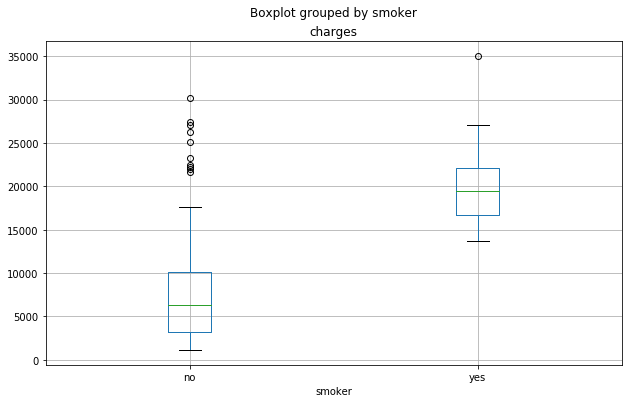

In [83]:
# lets confirm that both groups have outliars.

ins1= ins.loc[(ins['bmi'] >= 18.5) & (ins['bmi'] <= 24.9)]
print(ins1.info())
ins1.boxplot('charges', by='smoker', figsize=(10, 6))

In [89]:
# now lets take out the outliars
# again i will use the 1.5 IQR rule. lo1,2/ho1,2:lower/higher outliar for healthy_nonsmoker/healthy_smoker

# for healthy_nonsmoker:
IQR1 =  1.5 * stats.iqr(healthy_nonsmoker.charges)
LQ1 = np.quantile(healthy_nonsmoker.charges, .25)
HQ1 = np.quantile(healthy_nonsmoker.charges, .75)
lo1 = LQ1 - IQR1
ho1 = HQ1 + IQR1
print(lo1)  # no lower outliars, consistent w boxplot
print(ho1)


# for healthy_smoker:
IQR2 =  1.5 * stats.iqr(healthy_smoker.charges)
LQ2 = np.quantile(healthy_smoker.charges, .25)
HQ2 = np.quantile(healthy_smoker.charges, .75)
lo2 = LQ2 - IQR2
ho2 = HQ2 + IQR2
print(lo2)  # no lower outliars, consistent w boxplot
print(ho2)

-7301.579300000001
20648.196300000003
8517.7234875
30303.431787499998


In [91]:
# redefine the groups

healthy_nonsmoker1 = healthy_nonsmoker[healthy_nonsmoker.charges<ho1]
healthy_nonsmoker1.info()
   
healthy_smoker1 = healthy_smoker[healthy_smoker.charges<ho2]
healthy_smoker1.info()
   

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 15 to 1316
Data columns (total 7 columns):
age         162 non-null int64
sex         162 non-null object
bmi         162 non-null float64
children    162 non-null int64
smoker      162 non-null object
region      162 non-null object
charges     162 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 10.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49 entries, 58 to 1314
Data columns (total 7 columns):
age         49 non-null int64
sex         49 non-null object
bmi         49 non-null float64
children    49 non-null int64
smoker      49 non-null object
region      49 non-null object
charges     49 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 3.1+ KB


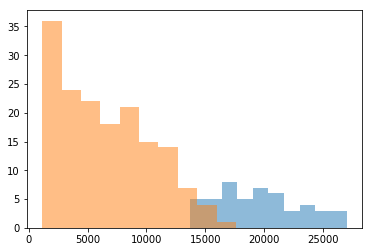

DescribeResult(nobs=49, minmax=(13747.87235, 27037.9141), mean=19633.506276530614, variance=13164171.704432884, skewness=0.3140359941954967, kurtosis=-0.816899152828443)
DescribeResult(nobs=162, minmax=(1121.8739, 17626.23951), mean=6541.36994617284, variance=15343105.115376597, skewness=0.4648399920535616, kurtosis=-0.8403193779397431)


In [92]:
# check whether redefined datasets are normal distro?

plt.hist(healthy_smoker1['charges'], alpha = 0.5)
plt.hist(healthy_nonsmoker1['charges'], alpha = .5)
plt.show()

print(stats.describe(healthy_smoker1['charges']))
print(stats.describe(healthy_nonsmoker1['charges']))


# both skewness and kurtosis are close enough normal distro.

In [93]:
# Conduct the t-test--> p value is close to 0, thus reject null, 
# ie charges for smoker and non smoker has diff

stats.ttest_ind(healthy_smoker1['charges'], healthy_nonsmoker1['charges'])

Ttest_indResult(statistic=20.843405291628105, pvalue=6.184628923310027e-53)

In [94]:
# Confidence interval: lets get down to the charges to see how much is the difference.

get_95_ci(healthy_smoker1['charges'], healthy_nonsmoker1['charges'])
                                                         
# smokers are paying 12k to 14k more than non smokers do on a 95% confidence interval. 
# that is a lot of money! 
# smokers: even you are healthy, you still pay more!

'The difference in means at the 95% confidence interval (two-tail) is between -14273.623112348101 and -11910.649548367452.'

# Results

Based on visual inspection, there are obvious outliars in the selected datasets and subgroups, so I used the 1.5 IQR rule to take out the outliars and continue with the analysis. 

Based on the skewness and kutosis close enough to normal distribution after taking out the outliars, I proceeded with the t-test. Based on a close to zero p-value, I reject the null that there is no significant difference in means.

The 95% confidence interval(two-tail) suggests that:

1. The difference in means for non smokers and smokers groups is between -25865.76609456014 and -23077.716092358227.

2. The difference in means for healthy nonsmokers and healthy smokers is between -14273.623112348101 and -11910.649548367452.



# Discussion and recommendation

Some smokers would think as long as they are healthy, they have no differences compare to nonsmokers. However, it is not exactly true. While being healthy does help smokers pay less 
for insurance charges compare to their less healthy club members, they still pay significantly more than nonsmokers. 

One issue in this design is that BMI does not fully represent a person's healthy level, nor is it the sole factor to determin insuarance charges. 

As a next step in the process, let's examine whether there are other factors beside bmi can help smokers reduce their insurance charges, such as age, region, education level. We can examine thro A/B testing to see the results. I would like to have geographic data along with physical data to do further analysis.

